In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Da=pd.read_csv("I:/FLAIRMINDS/Product_matching/attribute-data-category.csv")
Da

,id,product_id,website_id,normalized_leaf_category_id,processed_name,attribute_name,attribute_value,attr_guid,extra_attr,extra_attr_type,converted_attribute_values,created_at,updated_at
0,39236864,45096383,2,19476,specification table 3,specification,ASIN:B097RHW2V9#||#Date First Available:June 2...,2538,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
1,39260882,45099430,2,19476,specification table 3,specification,Product Dimensions:0.39 x 0.39 x 0.39 inches#|...,2538,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
2,39815023,45180375,2,19476,specification table 3,specification,ASIN:B07YZ7RT1H#||#Date First Available:Octobe...,2538,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
3,39847396,45184893,2,19476,specification table 3,specification,"ASIN:B09H2TSHN2#||#Best Sellers Rank:#1,052,55...",2538,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
4,39949196,45199382,2,19476,specification table 3,specification,"ASIN:B08GWZH2YJ#||#Best Sellers Rank:#1,720,57...",2538,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123006,63018697,48112609,2,19476,customer reviews,rating review,4.2 out of 5 stars,1511,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
123007,64009787,48234876,2,19476,item model number,model number,MS-TREKSADAPT,661,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
123008,63735530,48200459,2,19544,manufacturer name,manufacturer,TFCFL,619,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
123009,63736640,48200601,2,19476,manufacturer name,manufacturer,WANGZE,619,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00


In [7]:
Da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123011 entries, 0 to 123010
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   id                           123011 non-null  int64 
 1   product_id                   123011 non-null  int64 
 2   website_id                   123011 non-null  int64 
 3   normalized_leaf_category_id  123011 non-null  int64 
 4   processed_name               123011 non-null  object
 5   attribute_name               123011 non-null  object
 6   attribute_value              123008 non-null  object
 7   attr_guid                    123011 non-null  object
 8   extra_attr                   123011 non-null  int64 
 9   extra_attr_type              123011 non-null  object
 10  converted_attribute_values   200 non-null     object
 11  created_at                   123011 non-null  object
 12  updated_at                   123011 non-null  object
dtypes: int64(5), o

### No. of unique products

In [9]:
len(np.unique(Da["product_id"]))

4016

### Occurence of each product in dataset

In [11]:
Da["product_id"].value_counts()

49281695    740
4514917     452
21245057    429
29511699    364
29511777    300
           ... 
14328815      7
14328288      7
14330810      7
14329088      7
14328234      7
Name: product_id, Length: 4016, dtype: int64

Maximum number of times a single product is repeated: 740



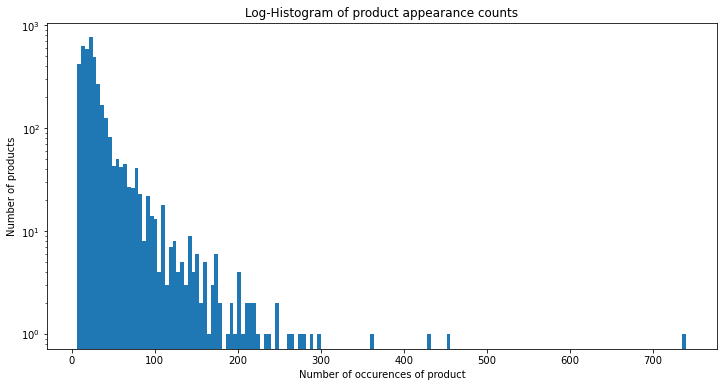

In [19]:
plt.figure(figsize=(12, 6))

plt.hist(Da["product_id"].value_counts(), bins=160)

plt.yscale('log', nonpositive='clip')

plt.title('Log-Histogram of product appearance counts')

plt.xlabel('Number of occurences of product')

plt.ylabel('Number of products')

print ('Maximum number of times a single product is repeated: {}\n'.format(max(Da["product_id"].value_counts()))) 

### No. of unique websites

In [3]:
np.unique(Da["website_id"])

array([2, 4], dtype=int64)

In [20]:
nan_rows = Da[Da.isnull().any(1)]
print (nan_rows)

              id  product_id  website_id  normalized_leaf_category_id  \
0       39236864    45096383           2                        19476   
1       39260882    45099430           2                        19476   
2       39815023    45180375           2                        19476   
3       39847396    45184893           2                        19476   
4       39949196    45199382           2                        19476   
...          ...         ...         ...                          ...   
123006  63018697    48112609           2                        19476   
123007  64009787    48234876           2                        19476   
123008  63735530    48200459           2                        19544   
123009  63736640    48200601           2                        19476   
123010  63295323    48145640           2                        19476   

               processed_name         attribute_name  \
0       specification table 3          specification   
1       spe

In [22]:
len(np.unique(Da["normalized_leaf_category_id"]))

135

In [24]:
for name in Da.columns:
    print(name,len(np.unique(Da[name])))

id 123011
product_id 4016
website_id 2
normalized_leaf_category_id 135
processed_name 325
attribute_name 234


TypeError: '<' not supported between instances of 'str' and 'float'

In [27]:
np.unique(Da["converted_attribute_values"])

TypeError: '<' not supported between instances of 'str' and 'float'

In [4]:
Dp=pd.read_csv("I:/FLAIRMINDS/Product_matching/product-data-category.csv")
Dp

,id,product_id,website_id,normalized_leaf_category_id,department_name,iksula_category_identifier,product_url,product_title,model_number,manufacturing_brand
0,1311275,48171894,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B09KQBQLZQ,Multifunctional Air Compressor,NaN,Generic
1,1310580,43184194,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B06Y3W2676,"Beverage Air 312-071B Compressor, 115V, 60 Hz,...",312-071B,Beverage Air
2,1310903,46036109,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B08NK54DG2,Vbestlife Air Compressor Spray Gun， Airbrush， ...,NaN,Vbestlife
3,1311137,47687124,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B08FXSQTCB,Ryobi P737D 18-Volt ONE+ Cordless High Pressur...,NaN,RYOBI
4,1311979,52530864,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B08P5KFNRD,2Pcs Air Compressor Cylinder Head Small 2.5/3P...,NaN,Fafeicy
...,...,...,...,...,...,...,...,...,...,...
4022,1311446,48873158,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B01L8Q30SI,Professional Portable Airbrush Black Mini Air ...,‎31CPR010,Generic
4023,1310830,45490321,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B077XB9745,Update -3 Set Pressure Electric High Pressure ...,NaN,TECHTONGDA
4024,1311723,49827612,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B09D7HK835,20V Tire Inflator Air Compressor Portable Bund...,NaN,WORKSITE
4025,1311219,47891808,2,19476,tools,ik_tools_portable air compressors,https://www.amazon.com/dp/B09DCK5H1M,HPDAVV High Pressure Air Compressor Oil-Free 1...,NaN,HPDAVV


In [5]:
Da[Da["product_id"]==47891808]

,id,product_id,website_id,normalized_leaf_category_id,processed_name,attribute_name,attribute_value,attr_guid,extra_attr,extra_attr_type,converted_attribute_values,created_at,updated_at
54720,61186889,47891808,2,19476,brand,brand,HPDAVV,84,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
55027,61186869,47891808,2,19476,category url,url,https://www.amazon.com/b?node=9022396011,1580,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
55113,61186886,47891808,2,19476,horsepower,Horsepower (hp),2.2 hp,29f17705-76e2-4aeb-9045-1309f537fc1b,0,thd,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
55343,61186878,47891808,2,19476,shipping_cost,shipping policy,Details,1532,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
55364,61186891,47891808,2,19476,asin,asin,B09DCK5H1M,1162,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
55437,61186859,47891808,2,19476,voltage,Voltage (v),110 volts (ac),b0341366-806d-4947-95a6-b31f85c3d68b,0,thd,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
55678,61186860,47891808,2,19476,wattage,wattage,1.5 kw,1110,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
55928,61186856,47891808,2,19476,item weight,Product Weight (lb.),66.1 pounds,e17c7a92-90d8-49b5-acbe-12bd21067613,0,thd,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
56079,61186843,47891808,2,19476,department,gender,tools,441,1,iksula,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00
56127,61186858,47891808,2,19476,power source,Power Type,Corded Electric,7631806d-4db9-4bcc-9f0e-075d4a43b410,0,thd,NaN,2022-07-19 08:28:30+00:00,2022-07-19 08:28:30+00:00


In [6]:
D["id"]

NameError: name 'D' is not defined

In [30]:
a=[[1,2],[0,5],[8,-5],[6,-1],[-3,4]]
a.sort(key=lambda arr:arr[1])
a

[[8, -5], [6, -1], [1, 2], [-3, 4], [0, 5]]

TypeError: '<' not supported between instances of 'int' and 'list'

In [17]:
x=lambda x:x**2
x(9)

81

In [69]:
a=[1,2,3,4]
b=[8,6,5,7]
c=[[A,B] for A,B in enumerate(zip(a,b))]
c

[[0, (1, 8)], [1, (2, 6)], [2, (3, 5)], [3, (4, 7)]]

In [101]:
b[::-1]

[7, 5, 6, 8]

In [45]:
c.sort(key=lambda x:x[1][1])
c

[[2, (3, 5)], [1, (2, 6)], [3, (4, 7)], [0, (1, 8)]]

In [49]:
c[0][1][1]

5

In [41]:
c[1][1][0]

2

In [35]:
for i,A in enumerate(a):
    print(A)

1
2
3
4


In [98]:
N=10
S=[12, 6, 16,12, 6, 9 ,16, 6, 17, 5]
F=[17 ,13 ,16 ,18 ,17 ,10 ,18 ,12 ,18, 11] 
def maxMeetings(N,S,F):
    # code here
    meet=[[i+1,S[i],F[i]] for i in range(N)]
    print(meet)
    meet.sort(key=lambda x:x[2])
    meet.sort(key=lambda x:x[2]-x[1])
    print(meet)
    ans=[meet[0][0]]
    start=meet[0][1]
    end=meet[0][2]
    for i in range(1,N):
        if meet[i][1]>end:
            ans.append(meet[i][0])
            start=meet[i][1]
            end=meet[i][2]
    return ans

In [99]:
maxMeetings(N,S,F)

[[1, 12, 17], [2, 6, 13], [3, 16, 16], [4, 12, 18], [5, 6, 17], [6, 9, 10], [7, 16, 18], [8, 6, 12], [9, 17, 18], [10, 5, 11]]
[[3, 16, 16], [6, 9, 10], [9, 17, 18], [7, 16, 18], [1, 12, 17], [10, 5, 11], [8, 6, 12], [4, 12, 18], [2, 6, 13], [5, 6, 17]]


[3, 9]

In [ ]:
def candyStore(candies,N,K):
    def help(arr):
        ans=0
        print(ans)
        while arr:
            ans+=arr[0]
            if len(arr)>K:
                arr=arr[1:len(arr)-K]
                print(arr)
        return ans


    # code here
    candies.sort()
    min_cost=help(candies)
    max_cost=help(candies[::-1])
    return min_cost,max_cost

In [ ]:
N = 4
K = 2
candies = [3,2,1,4]
candyStore(candies,N,K)

In [114]:
def help(arr,K):
    ans=0
    print(ans)
    while arr:
        ans+=arr[0]
        if len(arr)>K:
            arr=arr[1:len(arr)-K]
            print(arr)
    return ans

help(candies,2)

0
[2]


KeyboardInterrupt: 

In [137]:
import heapq
A=[3,2,1,4]
heapq.heapify(A)

In [138]:
A

[1, 2, 3, 4]

In [139]:
heapq.heappop(A)

1

In [140]:
heapq.heappop(A)

2

In [141]:
A

[3, 4]

In [142]:
heapq.heappush(A,15)
A

[3, 4, 15]

In [143]:
A

[3, 4, 15]

In [144]:
A.top()

AttributeError: 'list' object has no attribute 'top'

In [145]:
import heapq as h

In [150]:
a=[]
a=h(a)
a.heappush(10)


TypeError: 'module' object is not callable

In [32]:
x=[1,2,34,5,2,1,8,9,4,5,6,0,3,1]
# x=pd.DataFrame(x)
def high(w):
    if w>7:
        return "high"
    return "low"
x=map(high,x)

In [34]:
list(x)

['low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low']